# Homework 1 ATED - Group 1

In [2]:
%pylab inline
import math
import time
import copy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


## HW1-1

#### You are short 100 at-the-money call option contracts on the S&P 500 index expiring in one year with a contract multiplier of 100. The current index level is 2600, the interest and dividend rates are zero.

##### Simulate the evolution of the index level at periods Δt as a geometric Brownian motion with volatility $\sigma$ (free parameter) and calculate the corresponding call value, delta, gamma and theta using a fixed 20\% implied volatility.

In [3]:
# CODE

##### Then simulate your actual cumulative P\&L when periodically delta-hedging your position (assuming you can trade the index as an asset) and compare it against the proxy formula on slide 11 for the following matrix of parameters.

In [4]:
# CODE

##### Provide a statistical analysis of your results over 10,000 simulations, where one simulation is an entire index path.

In [5]:
# CODE

## HW1-3

#### On March 29, 2018 the S$\&$P 500 index (SPX) is 2611.53 and the 12-month VIX is 21.28. The implied volatility smile of SPX options expiring on March 15, 2019 is given as:
$$ \sigma^* = \sqrt{a + b \left( \rho (x - m)  + \sqrt{(x-m)^2 + s^2} \right)} $$
#### where $a = 0.009$, $b = 0.11$, $\rho = −0.12$, $m = 0.2$, $s = 0.05$, $x = \log \frac{K}{F}$ is log-moneyness and $F = 2625.10$ is the forward price. The continuous interest rate is 2.09 % p.a.

##### Draw the implied volatility smile curve for strikes $500 \leq K \leq 5000$.

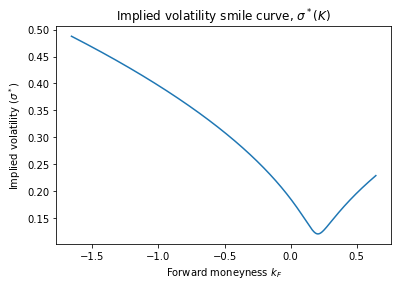

In [9]:
a, b, rho, m, s = .009, .11, -.12, .2, .05
s2, F, r = s**2, 2625.10, .0209
strikes = np.arange(500, 5000, 1)
moneyness = np.array(np.log(strikes/F))

impliedVolSVImodel = lambda x : np.sqrt(a + b * (rho * (x - m) + np.sqrt((x-m)**2 + s**2)))
sviSmile = [impliedVolSVImodel(m) for m in moneyness]

plt.plot(moneyness, sviSmile)
plt.xlabel('Forward moneyness $k_F$')
plt.ylabel(r'Implied volatility $(\sigma^*)$')
plt.title('Implied volatility smile curve, $\sigma^*(K)$')
# plt.show()
plt.savefig('impliedVol.png')

##### Calculate the fair strike $K_{var}$ of a variance swap expiring on March 15, 2019 with the method of your choice. How close is your calculation to the 12-month VIX? Why is it not exactly the same?

In [7]:
def fractionalSums(df, o) :
    if (o == 1) : # Call options
        df = df.loc[df['Strike'] >= F]
    else :
        df = df.loc[df['Strike'] <= F]
    deltaK = df[['Strike']].diff()
    deltaK.iloc[0] = deltaK.iloc[1]
    
    sum = 0.0
    for i in np.arange(len(df)) :
        sum += df.iat[i,1] * deltaK.iloc[i]['Strike'] / (df.iat[i,0]**2)
    return(sum)

puts = pd.read_excel('SPX_optionsData.xlsx', sheetname = 'Data_Put')
calls = pd.read_excel('SPX_optionsData.xlsx', sheetname = 'Data_Call')

In [8]:
T = 1
K_var = 100*math.sqrt(2*math.exp(r*T)/T * (fractionalSums(puts, -1) + fractionalSums(calls, 1)))
print(K_var, 21.28-K_var)

19.034461743021915 2.2455382569780866


The computation for $K_{var}$ is quite close to the 12-month VIX.
$$VIX-K_{var}=21.28-19.03=2.25$$

In [10]:
print((21.28-K_var)/K_var)

0.1179722488239683
